In [1]:
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import keras 
from keras.models import Sequential 
from keras.layers import Dense 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [2]:
# Load and prepare the dataset
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
X = data.iloc[:,:13].values 
y = data["target"].values

In [4]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [5]:
# Scale the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
# Build the ANN model
classifier = Sequential()
classifier.add(Dense(activation="relu", input_dim=13, units=8, kernel_initializer="uniform"))
classifier.add(Dense(activation="relu", units=14, kernel_initializer="uniform"))
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [7]:
# Fit the model
classifier.fit(X_train, y_train, batch_size=8, epochs=100)


Epoch 1/100
27/27 [==============================] - 0s 485us/step - loss: 0.6927 - accuracy: 0.5236
Epoch 2/100
27/27 [==============================] - 0s 384us/step - loss: 0.6901 - accuracy: 0.5849
Epoch 3/100
27/27 [==============================] - 0s 344us/step - loss: 0.6792 - accuracy: 0.8019
Epoch 4/100
27/27 [==============================] - 0s 326us/step - loss: 0.6514 - accuracy: 0.8585
Epoch 5/100
27/27 [==============================] - 0s 300us/step - loss: 0.5988 - accuracy: 0.8585
Epoch 6/100
27/27 [==============================] - 0s 326us/step - loss: 0.5281 - accuracy: 0.8632
Epoch 7/100
27/27 [==============================] - 0s 305us/step - loss: 0.4630 - accuracy: 0.8679
Epoch 8/100
27/27 [==============================] - 0s 326us/step - loss: 0.4108 - accuracy: 0.8679
Epoch 9/100
27/27 [==============================] - 0s 305us/step - loss: 0.3800 - accuracy: 0.8726
Epoch 10/100
27/27 [==============================] - 0s 312us/step - loss: 0.3587 - accura

In [8]:
# Perform predictions on the test set
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary predictions


3/3 [==============================] - 0s 703us/step


[[35  9]
 [ 4 43]]


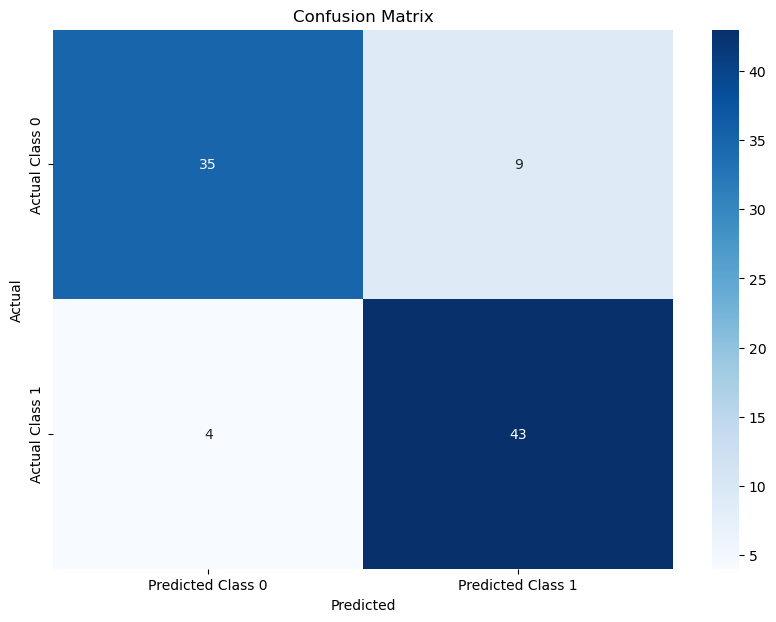

In [9]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Class 0', 'Predicted Class 1'], yticklabels=['Actual Class 0', 'Actual Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [10]:
# Calculate accuracy
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][1] + cm[1][0] + cm[0][0] + cm[1][1])
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 85.71%


In [11]:
#Checking the first 10 predictions and providing interpretation
for i in range(10):
    prediction = 'Heart Disease' if y_pred[i] else 'No Heart Disease'
    print(f"Person {i+1}: {prediction}")
    if y_pred[i]:
        print("The model predicts that this person has heart disease. Given the model's accuracy, there is a high probability that this prediction is correct. It is advisable to consult with a healthcare professional for a comprehensive evaluation.")
    else:
        print("The model predicts that this person does not have heart disease. The individual is likely healthy with respect to heart disease, but regular check-ups and monitoring are recommended to ensure ongoing heart health.")


Person 1: No Heart Disease
The model predicts that this person does not have heart disease. The individual is likely healthy with respect to heart disease, but regular check-ups and monitoring are recommended to ensure ongoing heart health.
Person 2: Heart Disease
The model predicts that this person has heart disease. Given the model's accuracy, there is a high probability that this prediction is correct. It is advisable to consult with a healthcare professional for a comprehensive evaluation.
Person 3: Heart Disease
The model predicts that this person has heart disease. Given the model's accuracy, there is a high probability that this prediction is correct. It is advisable to consult with a healthcare professional for a comprehensive evaluation.
Person 4: No Heart Disease
The model predicts that this person does not have heart disease. The individual is likely healthy with respect to heart disease, but regular check-ups and monitoring are recommended to ensure ongoing heart health.
Pe

10/10 [==============================] - 0s 350us/step
Percentage of individuals predicted to have heart disease: 57.43%
Percentage of individuals predicted not to have heart disease: 42.57%


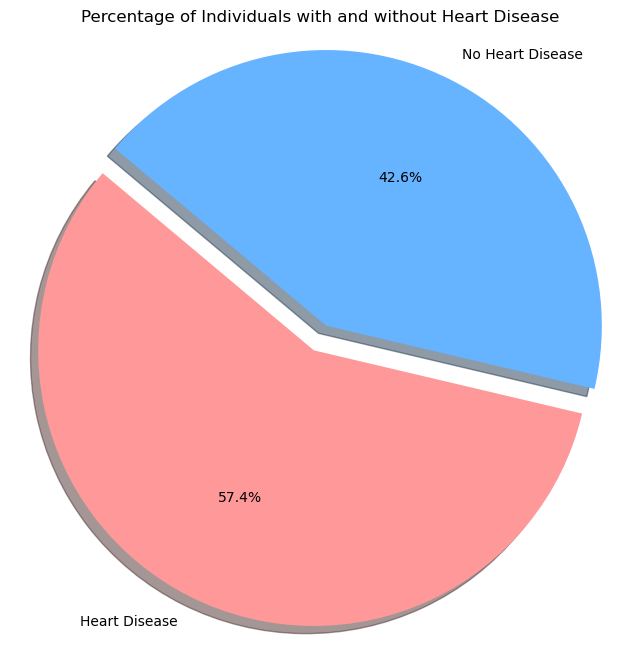

In [12]:
# Predict for the entire dataset (training + test set)
X_full = np.concatenate((X_train, X_test), axis=0)
y_pred_full = classifier.predict(X_full)
y_pred_full = (y_pred_full > 0.5)  # Convert probabilities to binary predictions

# Calculate the percentage of predictions
total_count = len(y_pred_full)
heart_disease_count = np.sum(y_pred_full)
no_heart_disease_count = total_count - heart_disease_count

heart_disease_percentage = (heart_disease_count / total_count) * 100
no_heart_disease_percentage = (no_heart_disease_count / total_count) * 100

print(f"Percentage of individuals predicted to have heart disease: {heart_disease_percentage:.2f}%")
print(f"Percentage of individuals predicted not to have heart disease: {no_heart_disease_percentage:.2f}%")

# Plotting the percentages
labels = ['Heart Disease', 'No Heart Disease']
sizes = [heart_disease_percentage, no_heart_disease_percentage]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode the first slice (Heart Disease)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Individuals with and without Heart Disease')
plt.show()
